# Exploratory Data Analysis on Google Playstore Dataset

In this notebook, we are going to perform exploratory data analysis and gain insights to understand customer demands better and help developers who have published their apps on playstore to popularize their products.

In [1]:
# Importing EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Importing dataset
playstore_df = pd.read_csv('/content/drive/MyDrive/EDA Google Playstore Dataset/data/googleplaystore.csv')
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the columns in the dataset
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# Checking the shape of dataset
playstore_df.shape

(10841, 13)

In [6]:
# Info about the dataset
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Descriptive statistics
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [21]:
playstore_df.loc[234]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                   11442
Size                                                       6.8M
Installs                                                 100000
Type                                                       Paid
Price                                                     $4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Name: 234, dtype: object

As we can see from the above description that `Installs` column contains a `+` sign, we will remove the `+` sign and convert it into numeric

In [12]:
playstore_df['Installs'] = playstore_df['Installs'].map(lambda x: x.rstrip('+'))
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].str.replace(',', ''))

ValueError: ignored

There is an error at row number 10472, let us check the row data at row number 10472

In [14]:
playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

As we can see, the values and the columns are misaligned, therefore, we will remove the row from the dataset

In [16]:
playstore_df.drop(playstore_df.index[10472], inplace=True)

In [17]:
playstore_df['Installs'] = playstore_df['Installs'].map(lambda x: x.rstrip('+'))
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].str.replace(',', ''))

Let us check aur updated column now

In [18]:
playstore_df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

Removing `$` from the values of Price column and converting it to numeric

In [22]:
playstore_df['Price'] = pd.to_numeric(playstore_df['Price'].str.replace('$', ''))

In [24]:
playstore_df['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [25]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [97]:
# Adding a new column due to high variance
playstore_df['log_installs'] = np.log10(playstore_df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
# Checking minimum and maximum downloads 
playstore_df['Installs'].min(), playstore_df['Installs'].max()

(0, 1000000000)

In [27]:
# Checking if dataframe contains any duplicate values
playstore_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
8 Ball Pool                                          7
ESPN                                                 7
                                                    ..
Dr. Cares - Pet Rescue 911 🐶                         1
EG Player                                            1
Absolute RC Heli Simulator                           1
BG+Phone Backup                                      1
Resume App                                           1
Name: App, Length: 9659, dtype: int64

Some of the apps are having multiple rows, we will have to remove duplicate elements

In [30]:
playstore_df[playstore_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


As we can see that for the 'ROBLOX' app, the number of reviews is different only rest everthing is same, therefore, we will remove the duplicate elements from the dataset

In [33]:
playstore_df.drop_duplicates(inplace = True)

Converting Reviews column to numeric

In [36]:
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'])

In [40]:
playstore_df = playstore_df.loc[playstore_df.groupby(['App'])['Reviews'].idxmax()]

In [41]:
# Setting up parameters for the plot
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

#### Top 20 apps on the playstore based on their genre

In [43]:
top_genres = playstore_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [44]:
genres_installs = playstore_df.groupby(['Genres'])[['Installs']].sum()

In [45]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


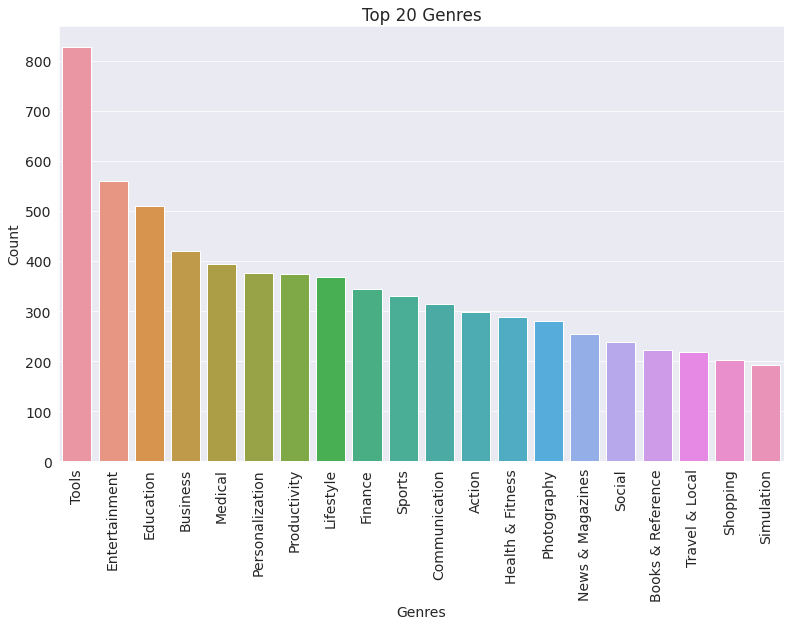

In [49]:
# Visualizing top 20 apps
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of applications")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show();

#### Top 20 most installed genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


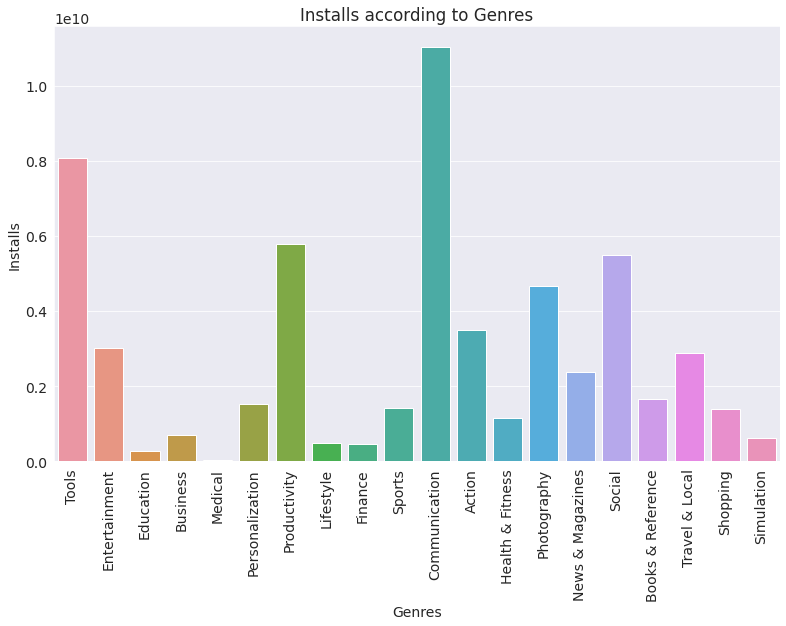

In [52]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [54]:
top_category = playstore_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})


In [56]:
category_installs = playstore_df.groupby(['Category'])[['Installs']].sum()

In [57]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


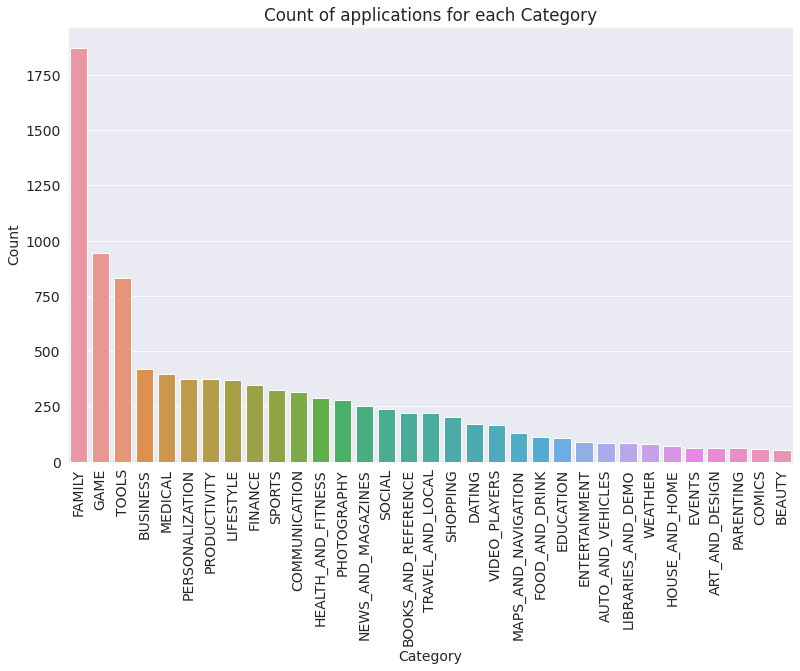

In [60]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


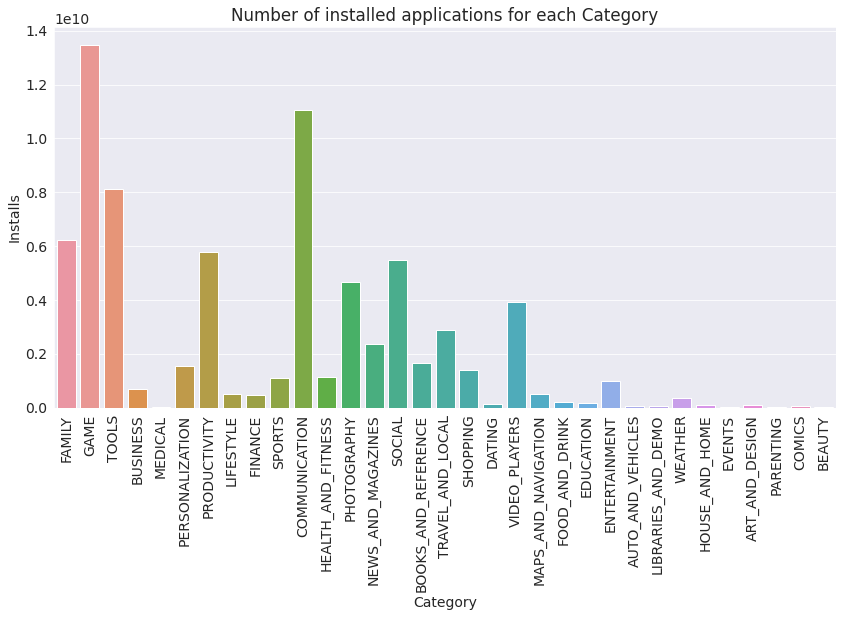

In [61]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.

### Average Rating

In [63]:
genres_ratings_df = playstore_df.groupby(['Genres'])[['Rating']].mean()

In [64]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [66]:
genres_installs_ratings['Rating'].describe()

count    114.000000
mean       4.248546
std        0.182448
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

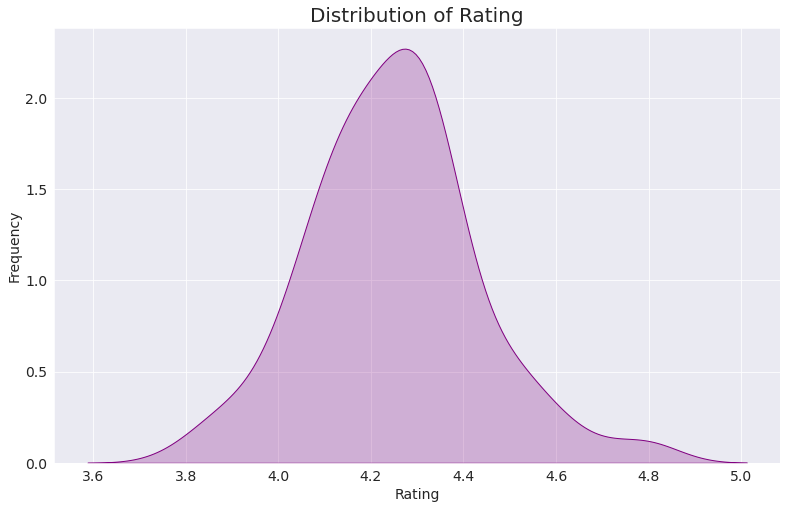

In [75]:
plt.figure(figsize=(13,8))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Purple", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

### Highest and Lowest rated genres

In [70]:
genres_installs_ratings.sort_values('Rating', ascending = False, inplace = True)

In [71]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


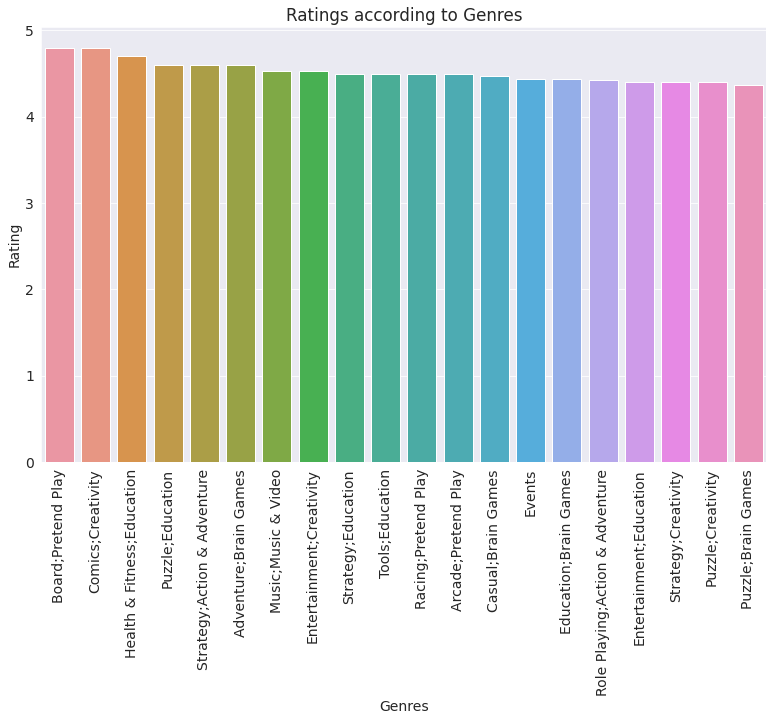

In [73]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


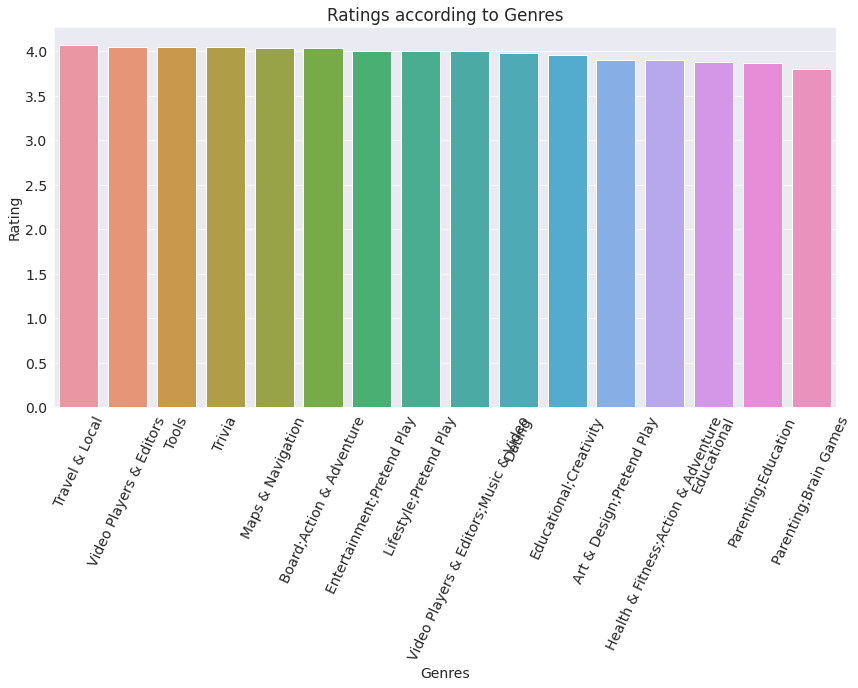

In [76]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

### What are the count of applications in each category differentiated by their type?


In [78]:
app_count = playstore_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [80]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

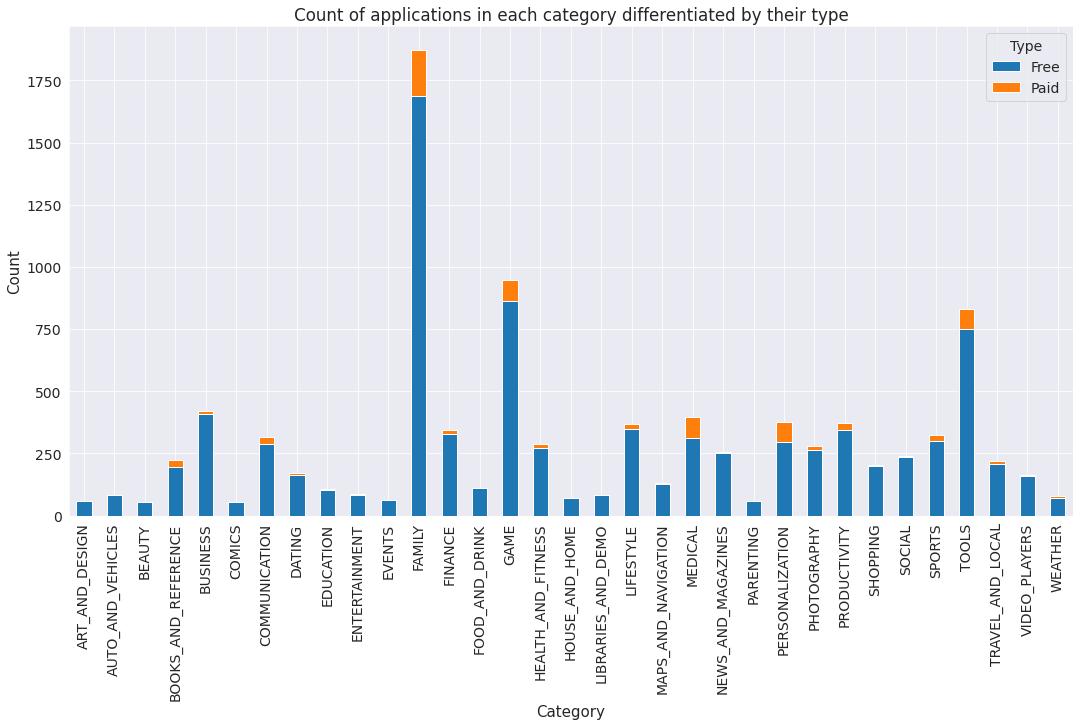

In [81]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

### How many apps were installed according to its type?


In [83]:
playstore_df['Gaming Category App'] = playstore_df['Category']=='GAME'

In [84]:
categoty_type_installs = playstore_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [85]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


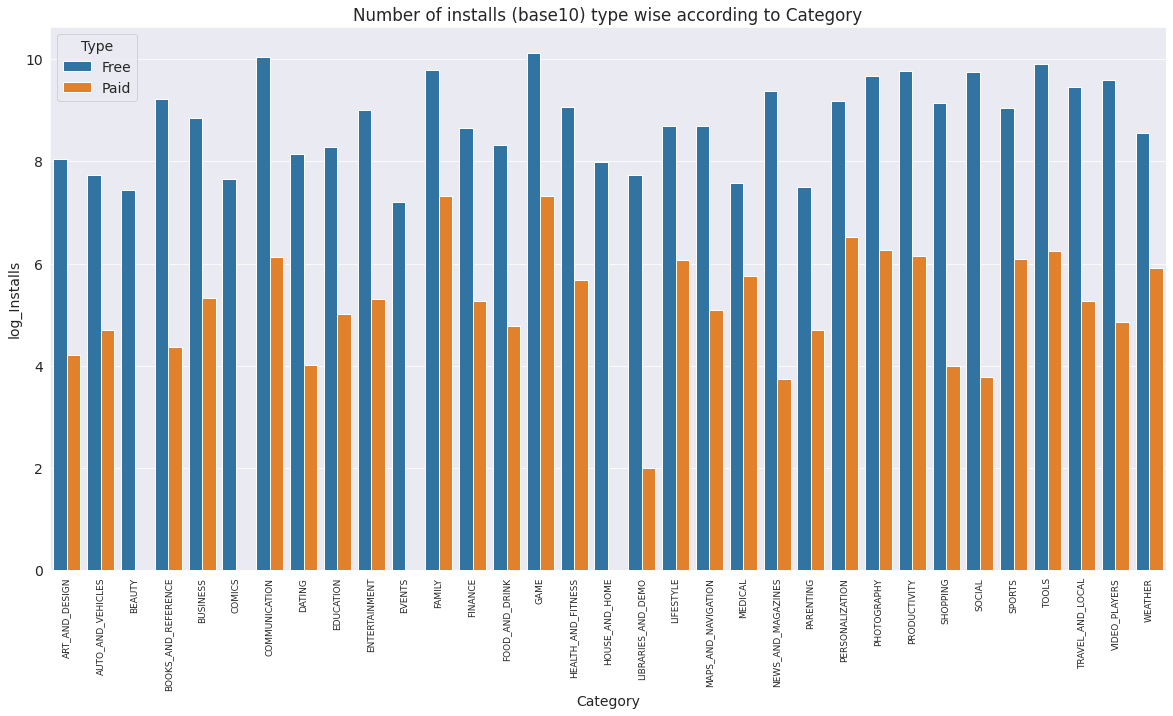

In [103]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs (base10)")
plt.title("Number of installs (base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

It can be concluded that the number of free applications installed by the user are high when compared with the paid ones.


Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.


In [90]:
# Converting KB to MB 
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x))

### How does size impact on the number of installs of any application?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


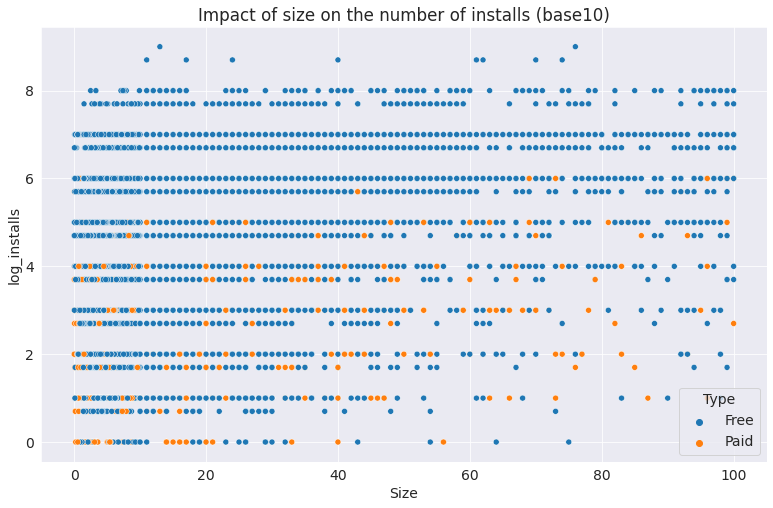

In [106]:
plt.figure(figsize=(13, 8))
plt.title("Impact of size on the number of installs (base10)")
sns.scatterplot(playstore_df['Size'], playstore_df['log_installs'], hue=playstore_df['Type'])
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

### Histogram of log installs

In [99]:
playstore_df.loc[playstore_df['log_installs']==playstore_df['log_installs'].min(),'log_installs']=  0

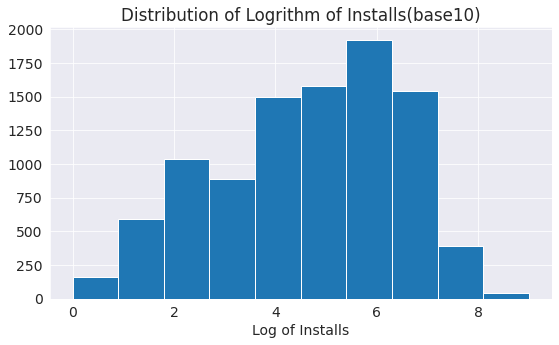

In [108]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(playstore_df['log_installs']);

### Histogram of size


In [111]:
# to remove null values from size column
playstore_df.loc[playstore_df['Size'].isnull(),'Size']=0

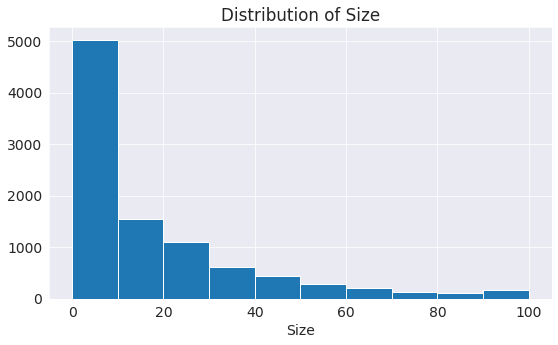

In [112]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(playstore_df['Size']);
plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.


## Importing the user reviews dataset and performing sentiment analysis

In [113]:
user_reviews_df = pd.read_csv('/content/drive/MyDrive/EDA Google Playstore Dataset/data/googleplaystore_user_reviews.csv')
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Merging dataframes on apps


In [115]:
merged_df = playstore_df.merge(user_reviews_df, on="App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Gaming Category App,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,False,5.69897,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,False,5.69897,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,False,5.69897,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,False,5.69897,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,False,5.69897,Best idea us,Positive,1.00,0.300000


### What is the distribution of type of reviews in the dataset?


In [116]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [117]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


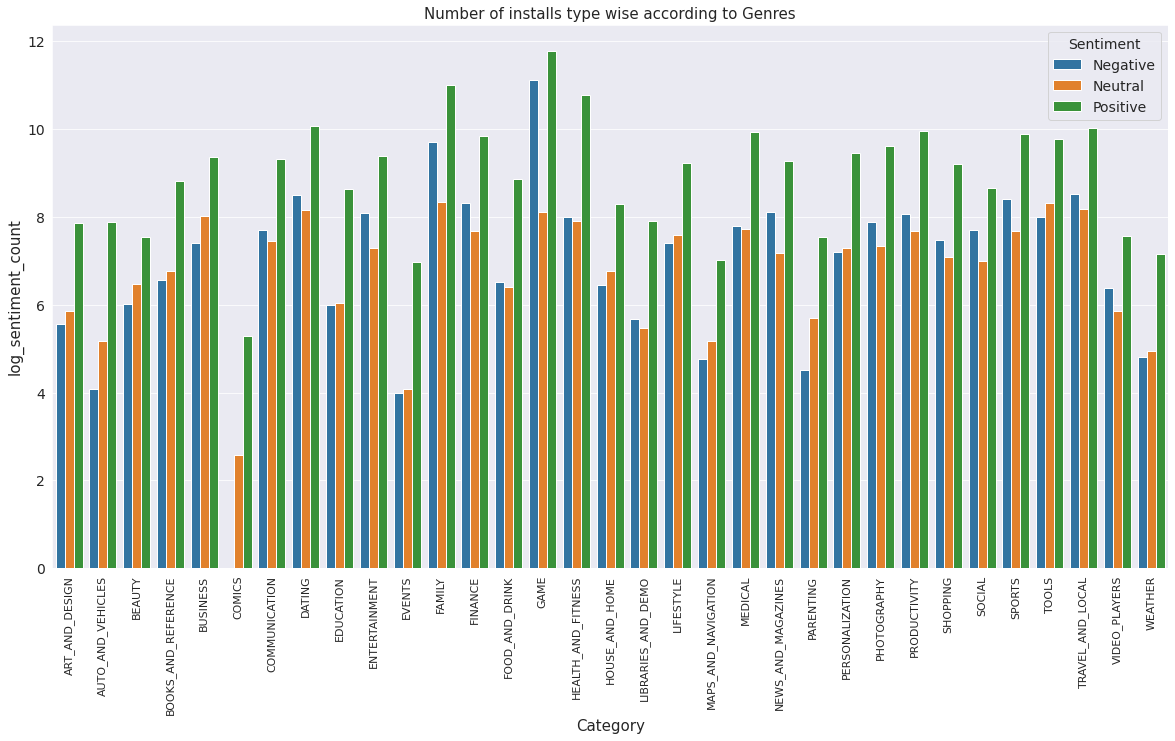

In [118]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

### Histogram of subjectivity

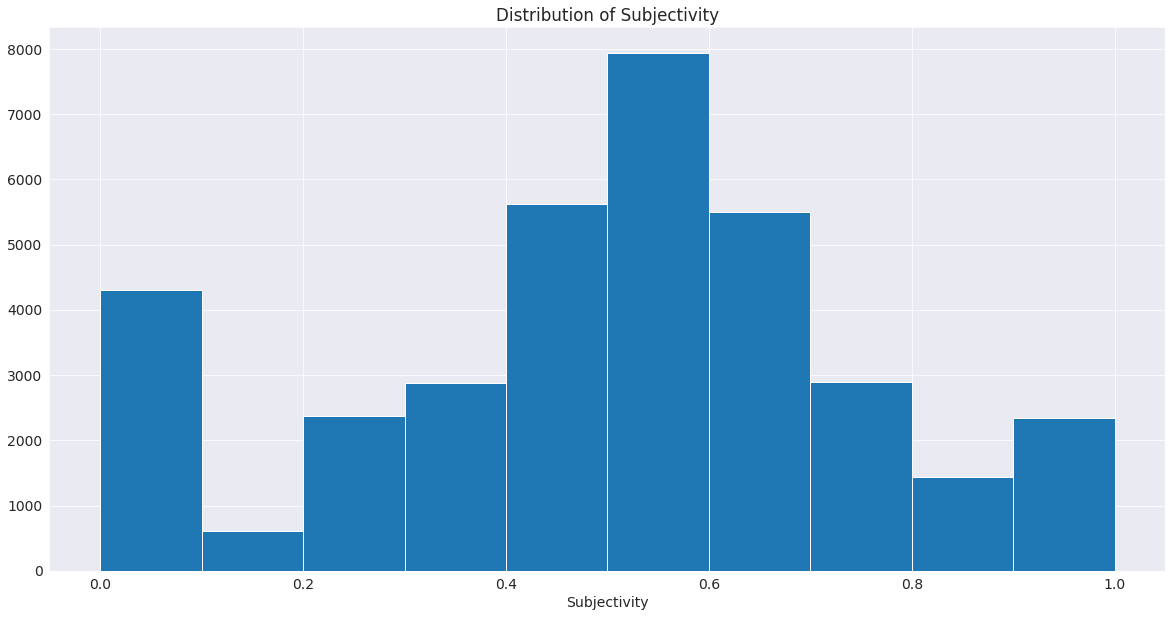

In [120]:
plt.figure(figsize=(20,10))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.


In [121]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

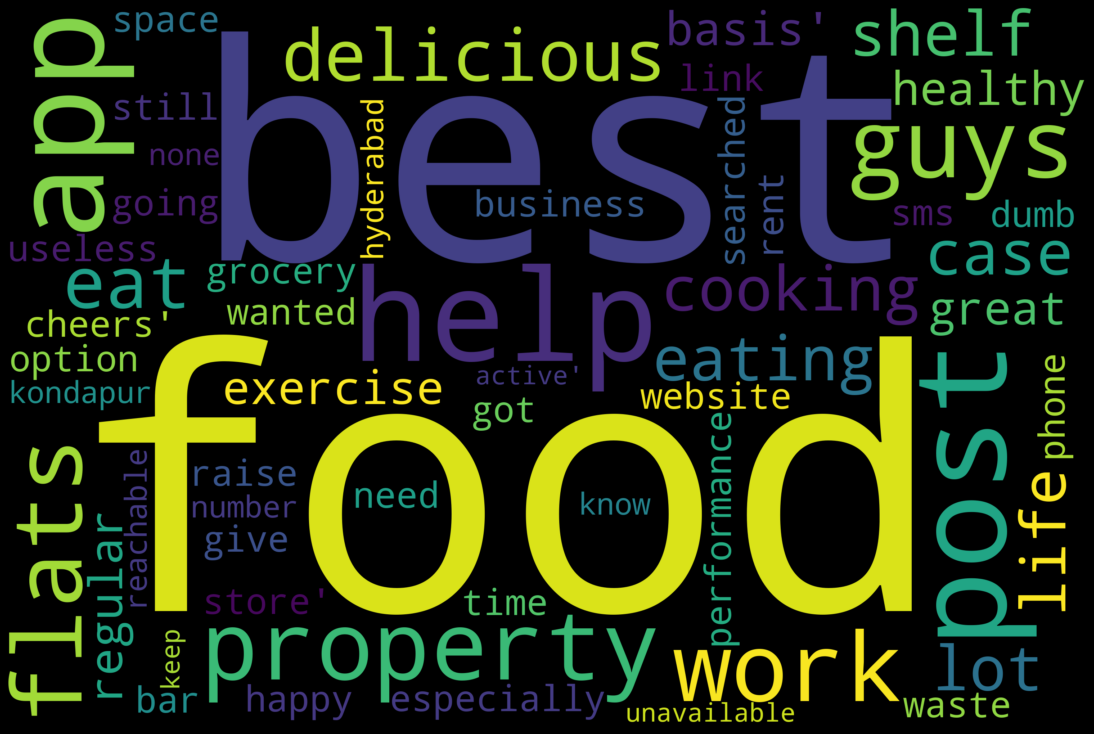

In [126]:
from wordcloud import WordCloud, STOPWORDS
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Percentage of review sentiments

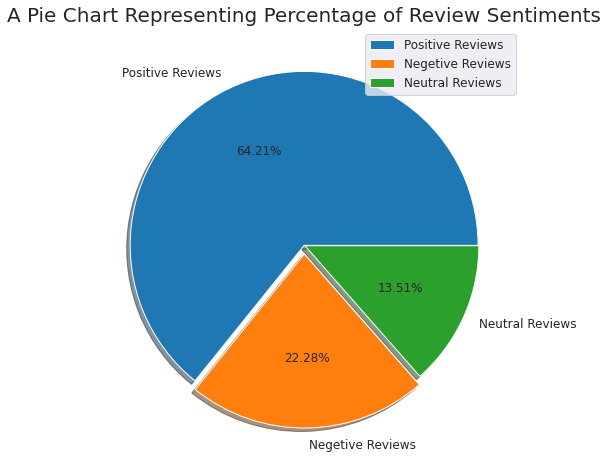

In [125]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()